USEFUL SPACY LINKS 

https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/

https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad

https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/#:~:text=Stemming,words%20with%20the%20same%20root.&text=It%20might%20be%20surprising%20to,it%20relies%20on%20lemmatization%20only.

https://spacy.io/usage/spacy-101#annotations

English Grammar

https://grammar.yourdictionary.com/grammar-rules-and-tips/basic-english-grammar-rules.html

# spaCy

## Introduction:

1. spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.
2. spaCy doesn't have stemming feature.
3. Faster than NLTK except in sentence tokenizing.
4. spaCy has no N_grams

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
nlp.pipe_names
#nlp.disable_pipes() #this code would disable the pipeline

['tagger', 'parser', 'ner']

In [3]:
para='this is john pravin, i am working for johnson controls in Mumbai'
doc=nlp(para)

## POS & Tagging

In [4]:
using_tag = [(word, word.tag_) for word in doc]
print(using_tag)

[(this, 'DT'), (is, 'VBZ'), (john, 'NNP'), (pravin, 'NNP'), (,, ','), (i, 'PRP'), (am, 'VBP'), (working, 'VBG'), (for, 'IN'), (johnson, 'NNP'), (controls, 'VBZ'), (in, 'IN'), (Mumbai, 'NNP')]


In [5]:
using_pos=[(word, word.pos_) for word in doc]
print(using_pos)

[(this, 'DET'), (is, 'AUX'), (john, 'PROPN'), (pravin, 'PROPN'), (,, 'PUNCT'), (i, 'PRON'), (am, 'AUX'), (working, 'VERB'), (for, 'ADP'), (johnson, 'PROPN'), (controls, 'VERB'), (in, 'ADP'), (Mumbai, 'PROPN')]


In [6]:
spacy.explain('NNP') #spacy.explain() #can explain all the functions/terms

'noun, proper singular'

## Removing Punt, Spaces, stop words

In [7]:
#is_stop to remove stop words, is_space to remove spaces, is_punct to remove puntuation
remove_punt = [(word.orth_, doc.vocab.strings[word.prefix]) for word in doc if not word.is_stop|word.is_punct|word.is_space] 
print(f'Original Sentences : {doc}\n')
print(f'After removal of stopwords, punctuation, space:{remove_punt}')

Original Sentences : this is john pravin, i am working for johnson controls in Mumbai

After removal of stopwords, punctuation, space:[('john', 'j'), ('pravin', 'p'), ('working', 'w'), ('johnson', 'j'), ('controls', 'c'), ('Mumbai', 'M')]


Note: There are is_stop, is_space, is_punct, is_digit, like_num, like_email, is_alpha, .prefix, .suffix etc

## Lemmatizer, in spaCy

In [8]:
lem=[word.lemma_ for word in nlp('ate')] 
print(lem) 

['eat']


## Entity Recognition

In [9]:
doc=nlp('i am an Indian, wanna study in canada next year')
entity=[(word, word.label_, word.start_char, word.end_char) for word in doc.ents]
print(entity)

[(Indian, 'NORP', 8, 14), (canada, 'GPE', 31, 37), (next year, 'DATE', 38, 47)]


## Matcher (an regex in steroids)

In [10]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
doc = nlp("You lemon book around")

#Define rule 
#pattern = [{'TEXT': 'lemon'}, {'POS': 'NOUN'}] #refer below images for attributes and uses
#pattern= [{'LENGTH': 3}, {'IS_LOWER': True}] #LENGHT - first word and IS_LOWER - second word
pattern=[{'IS_LOWER': True}]


# Add rule
matcher.add('rule_1', None, pattern)

In [11]:
matches = matcher(doc)
matches

[(7604275899133490726, 1, 2),
 (7604275899133490726, 2, 3),
 (7604275899133490726, 3, 4)]

In [12]:
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

lemon
book
around


### Attributes and uses of Matcher function

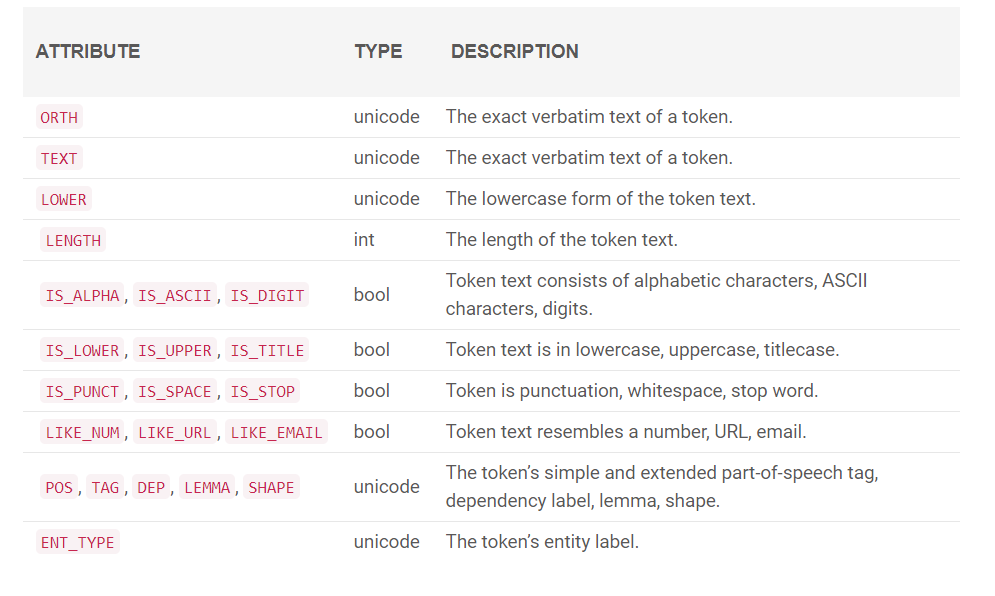

## Noun Chunk

In [13]:
noun = [(word.text) for word in doc.noun_chunks]
print(doc)
print(noun)

You lemon book around
['You']


## Sentence Tokenizer

In [14]:
sent= [sent.orth_ for sent in nlp('this is john. I am working in JCI').sents]
print(sent)

['this is john.', 'I am working in JCI']


## Similarities

In [15]:
doc=nlp('Orange and apple are fruits, circle and triangles are shapes afasegdsvh')
orange=doc[0]
apple=doc[2]
circle=doc[6]
fruit=doc[4]



print('orange <-> apple', orange.similarity(apple))
print('orange <-> circle', orange.similarity(circle))
print('circle <-> fruits', circle.similarity(fruit))
# pretty common words have vector in spaCy by default. 
# has_vector shows if the word has vector or not, also, is_oov denotes out of vectors
print(apple.has_vector, fruit.has_vector, fruit.is_oov) 

orange <-> apple 0.3102187
orange <-> circle 0.5211937
circle <-> fruits 0.21989292
True True False


C:\Users\jpravijo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if __name__ == '__main__':
C:\Users\jpravijo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. Yo